# Importing Libraries

In [1]:
import numpy as np  #Provides support for numerical operations and handling arrays.
import pandas as pd  #Used for data manipulation and analysis 
import warnings
warnings.filterwarnings("ignore") #Suppresses runtime warnings for cleaner outputs.
import matplotlib.pyplot as plt  #Creating static visualizations like plots and graphs.
import matplotlib.image as mpimg  # Reads and handles image files for visualization.
from PIL import Image  #Handles image file reading, manipulation, and saving.
import seaborn as sns  # Enhances Matplotlib for more aesthetic and statistical plots.
import cv2  #Performs advanced image processing 
import random  #Generates random numbers and shuffles data.
import os  #Interacts with the operating system, e.g., file and directory handling.

from collections import Counter #Counts occurrences of elements in a collection.
from sklearn.preprocessing import StandardScaler #Standardizes features by scaling to mean 0 and variance 1.
from sklearn.model_selection import train_test_split # Splits data into training and testing sets.
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau # Manages training (e.g., early stopping, learning rate adjustment).
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, plot_confusion_matrix

#from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold (Performs hyperparameter optimization via random search.)

from imblearn.over_sampling import SMOTE # Balances class distribution using synthetic data augmentation.

import tensorflow as tf #Framework for building, training, and deploying deep learning models.
import tensorflow_addons as tfa #Adds custom layers, optimizers, and metrics to TensorFlow.
import keras
from keras.models import Sequential #Defines and builds model architectures.
from keras.layers import Dense, Dropout, Activation, Flatten #Adds various layers (e.g., Dense, Conv2D) to neural networks.
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.applications import resnet
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img #Prepares image data for training (e.g., augmentation, normalization).

# Reading the image Datasets

In [2]:
directory = r"Desktop/pulmo_disease/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

In [3]:
import imageio  

size_data = {} 

for i in categories:  # Loops through each category in the 'categories' list
    path = os.path.join(directory, i)  # Combines the directory path and category name to get the full path of the category folder
    class_num = categories.index(i) 
    
    temp_dict = {}  # Initializes an empty dictionary to store the count of images with specific dimensions within the category

    for file in os.listdir(path):  # Loops through all the files in the folder corresponding to the current category
        filepath = os.path.join(path, file)  # Joins the folder path with the current file name to get the full path to the image
        height, width, channels = imageio.imread(filepath).shape
        
        # Checks if the combination of height and width is already in the dictionary (temp_dict)
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1  # If the dimensions exist, increments the count for that dimension
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1  # If dimensions don't exist, adds them with a count of 1
    
    size_data[i] = temp_dict  # After processing all images in the category, stores the temp_dict in size_data for that category

size_data  # Returns the dictionary that contains the count of image dimensions for each category


{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 623': 31,
  '512 x 512': 501,
  '512 x 801': 28,
  '404 x 511': 1},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Bengin cases


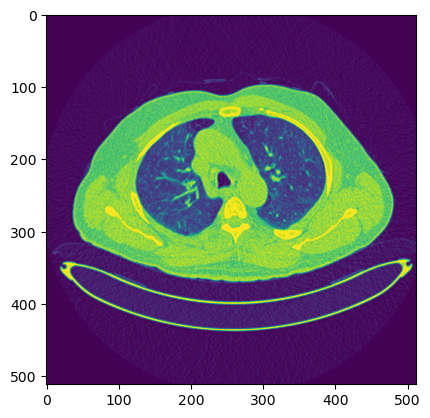

Malignant cases


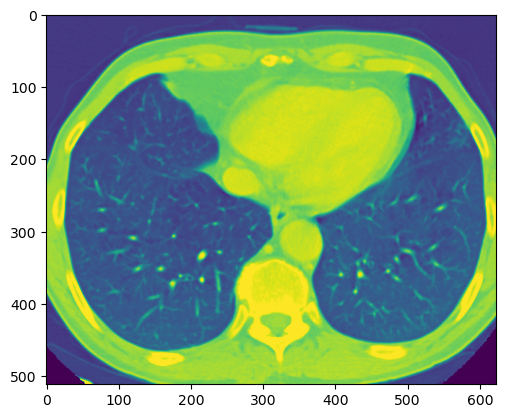

Normal cases


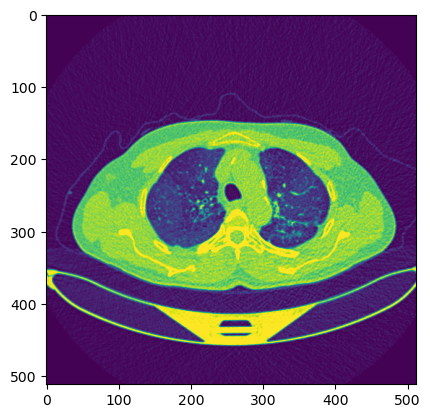

In [4]:
import matplotlib.pyplot as plt
for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

# Image Preprocessing and Testing

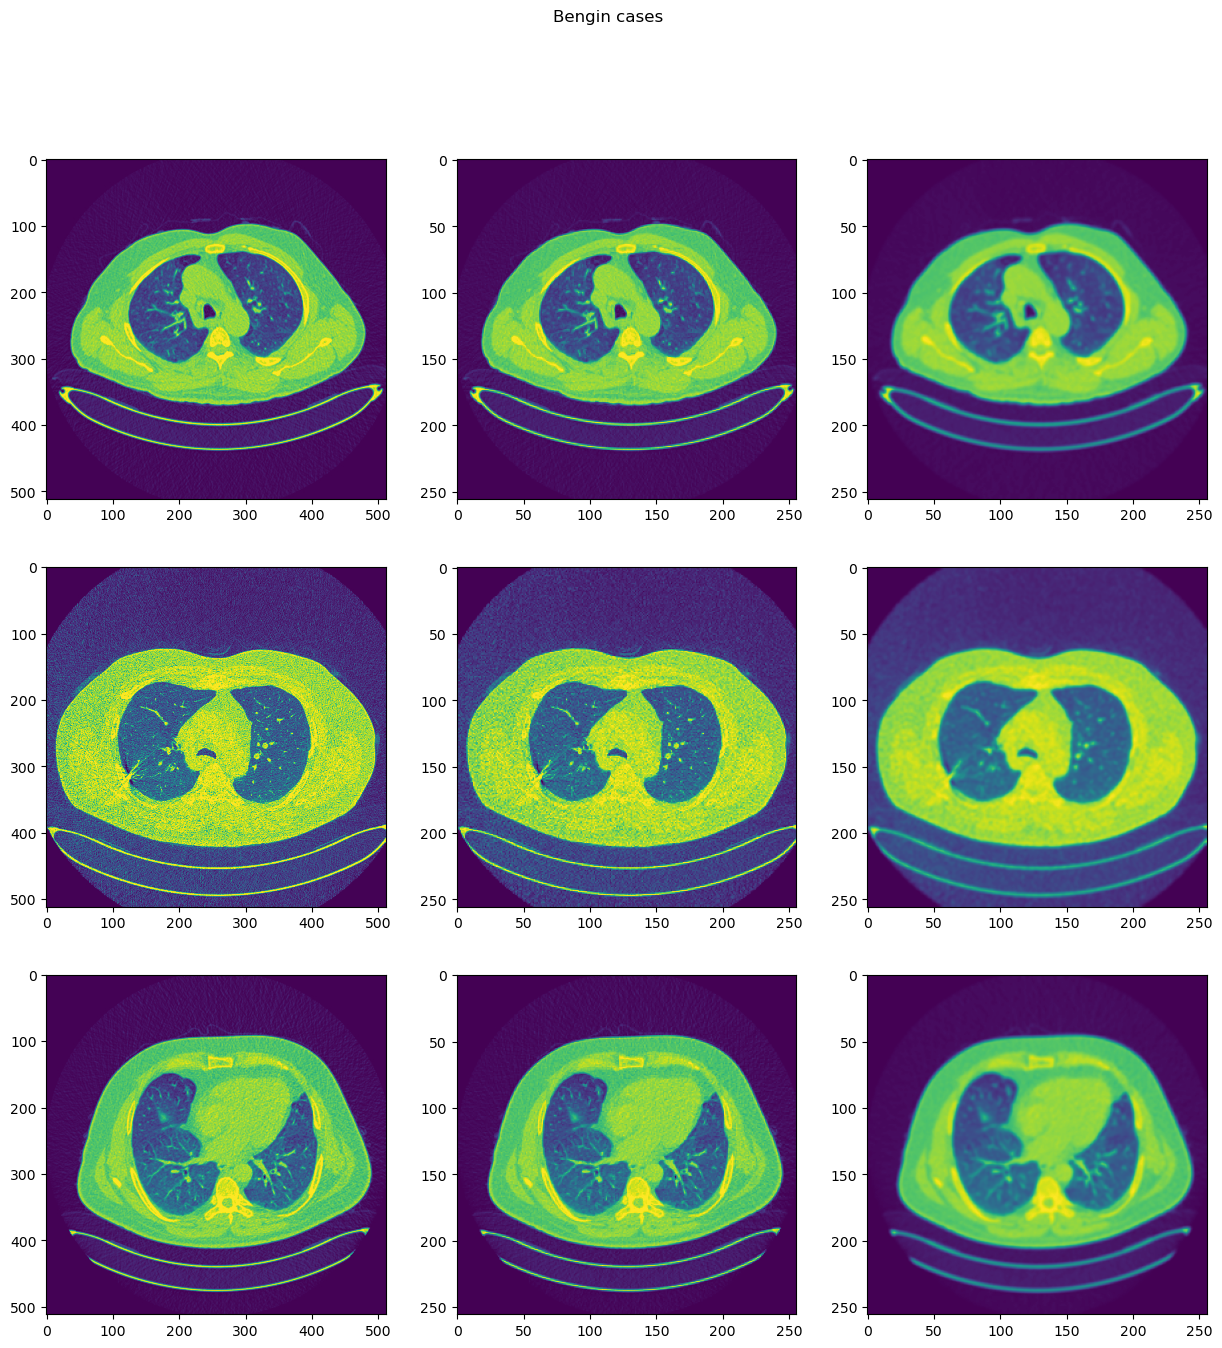

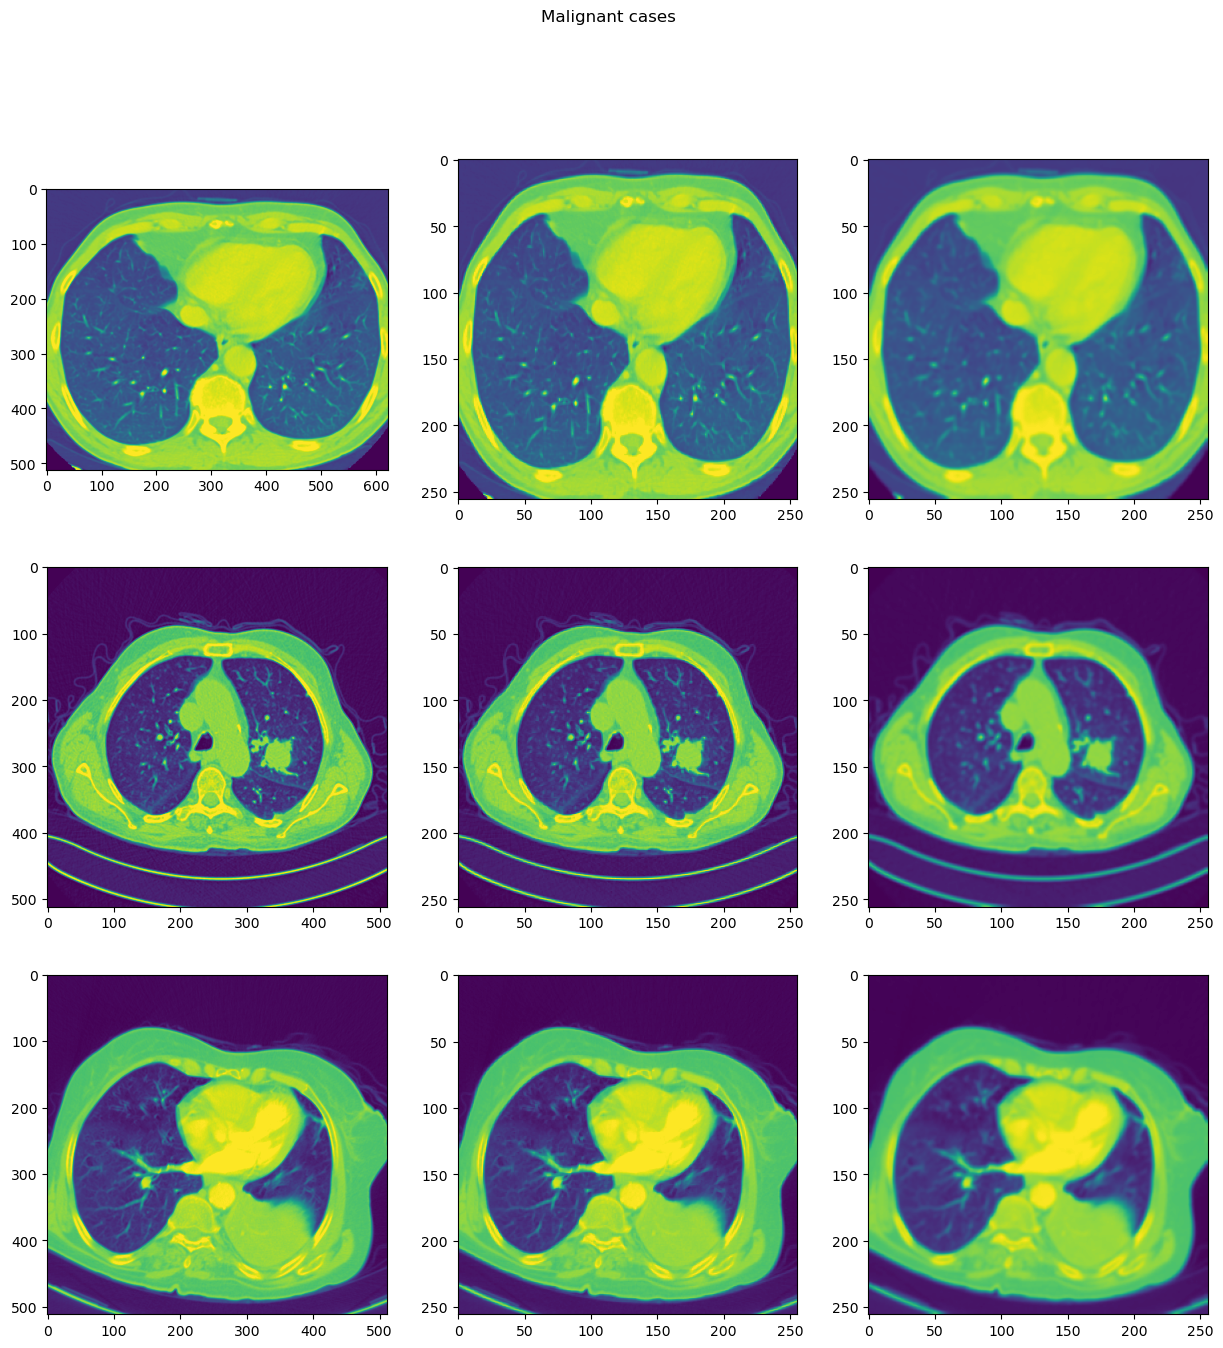

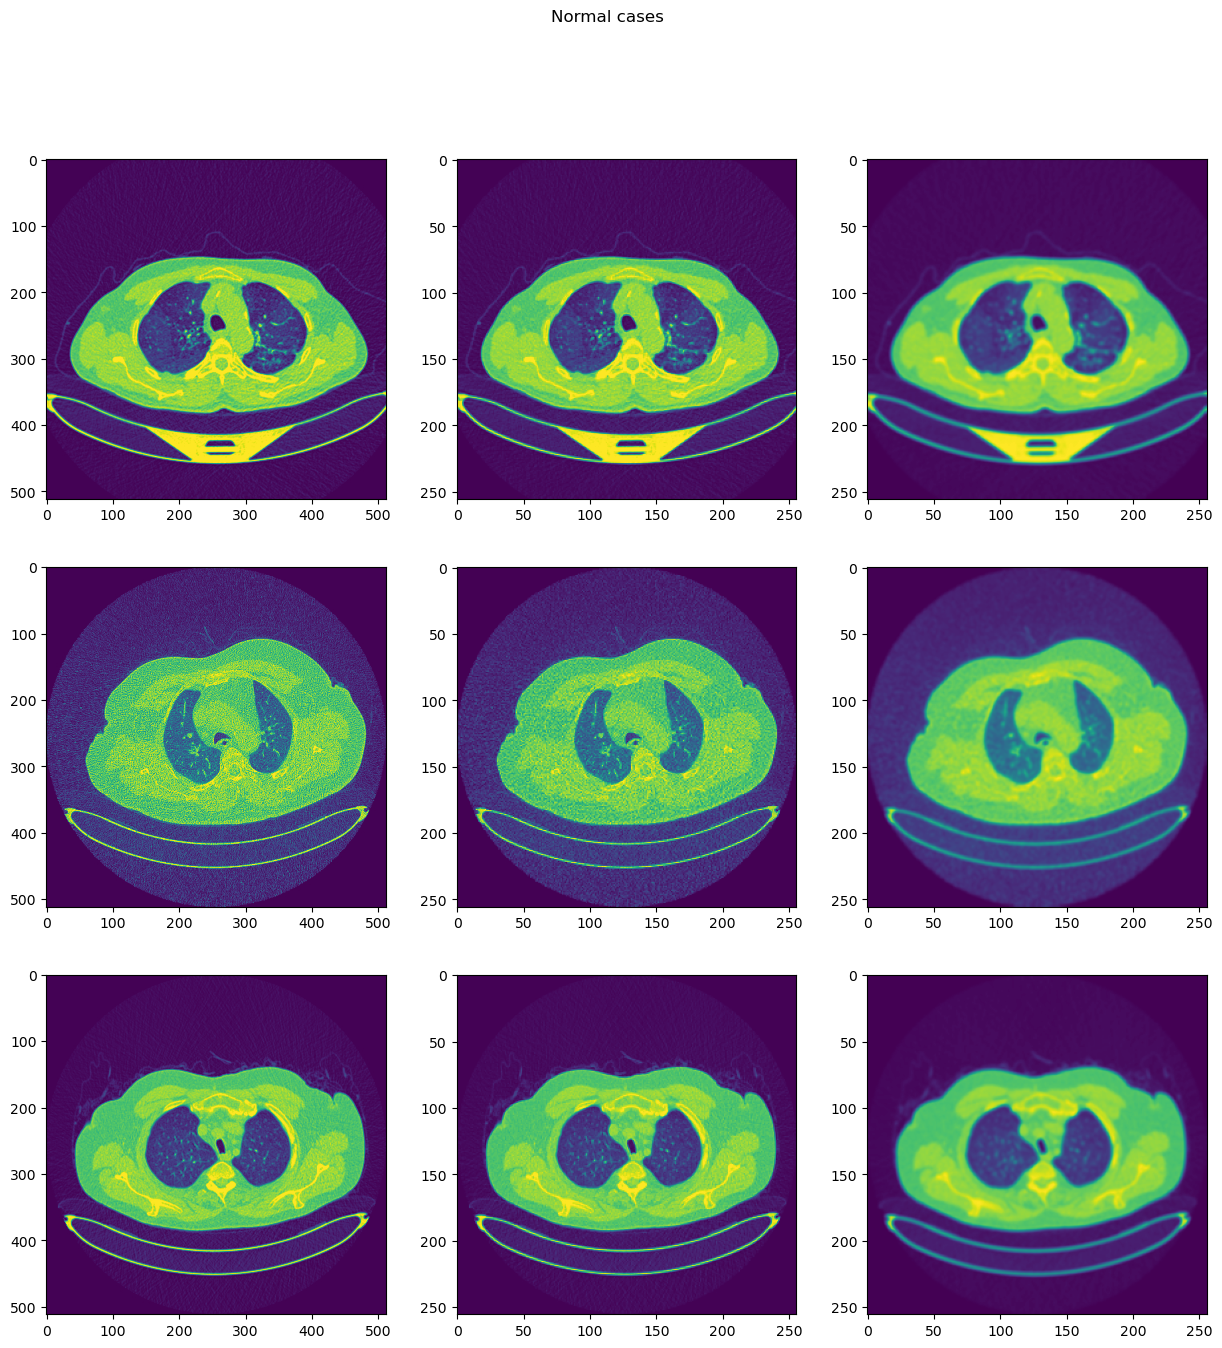

In [5]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0) # Apply a Gaussian blur to the resized image
        
        ax[cnt, 0].imshow(img)# Display the original grayscale image in the first column of the current row
        ax[cnt, 1].imshow(img0)# Display the resized image in the second column of the current row
        ax[cnt, 2].imshow(img1)# Display the blurred image in the third column of the current row
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

# Preparing Data

In [6]:
from collections import Counter  # Import Counter to count the occurrences of each label in the dataset

data = []  # Initialize an empty list to store image data and their corresponding labels
img_size = 256  # Define the target size to which all images will be resized

for i in categories:  # Iterate through each category in the 'categories' list
    path = os.path.join(directory, i)  # Construct the full path to the category's folder
    class_num = categories.index(i)  # Get the index of the current category as its label
    for file in os.listdir(path):  # Loop through all the files in the current category folder
        filepath = os.path.join(path, file)  # Construct the full path to the current file
        img = cv2.imread(filepath)  # Load the image in its default BGR color format
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image from BGR to RGB format
        img = cv2.resize(img, (img_size, img_size))  # Resize the image to the defined dimensions (256x256)
        data.append([img, class_num])  # Append the image and its label as a pair to the 'data' list

# Shuffle the data to mix images from different categories
random.shuffle(data)

# Separate features (images) and labels into X and y
X, y = [], []  # Initialize empty lists for features and labels
for feature, label in data:  # Iterate through the shuffled dataset
    X.append(feature)  # Append the image (feature) to X
    y.append(label)  # Append the label to y

# Normalize the pixel values of the images to the range [0, 1]
X = np.array(X) / 255.0  # Convert X to a NumPy array and scale pixel values by dividing by 255
y = np.array(y)  # Convert y(labels) to a NumPy array

# Check the shapes and label counts
print('X length:', len(X))  # Print the number of images in X
print('y counts:', Counter(y))  # Print the count of each label in y using the Counter class


X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [7]:
# 80% training and 20% validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

877 (877, 256, 256, 3)
220 (220, 256, 256, 3)


# Image Visualising

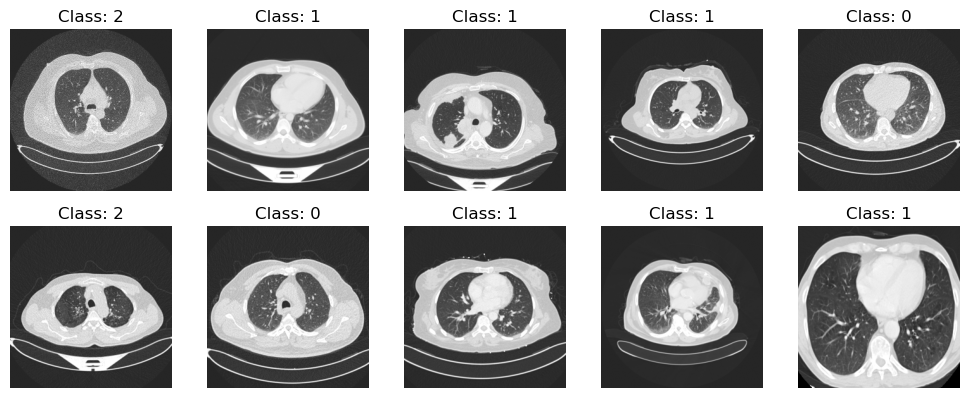

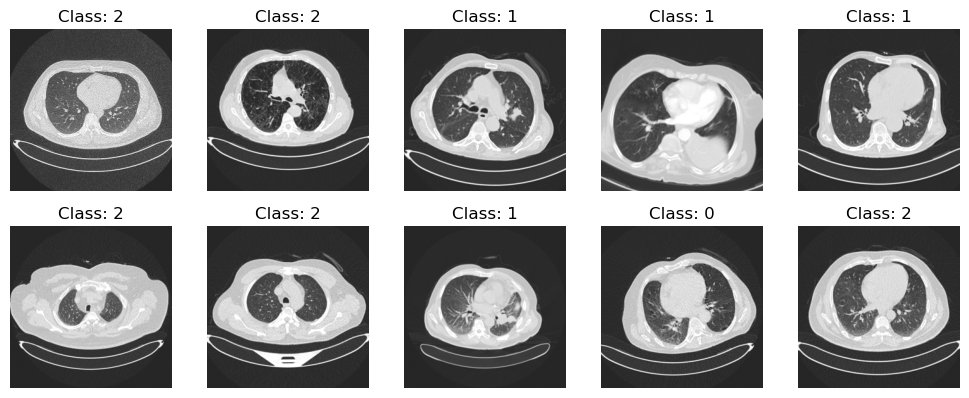

In [8]:
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization

# Display images from the training set (X_train)
plt.figure(figsize=(10, 10))  # Create a figure with a size of 10x10 inches
for i in range(10):  # Loop to display the first 10 images
    plt.subplot(5, 5, i + 1)  # Create a subplot grid of 5 rows and 5 columns; select the (i+1)th cell
    plt.imshow(X_train[i], cmap='gray')  # Display the i-th image in grayscale
    plt.axis('off')  # Remove the axis lines and labels for cleaner visualization
    plt.title(f"Class: {y_train[i]}")  # Add the class label as the title of the subplot
plt.tight_layout()  # Adjust subplot spacing to minimize overlap
plt.show()  # Display the figure

# Display images from the validation set (X_valid)
plt.figure(figsize=(10, 10))  # Create a figure with a size of 10x10 inches
for i in range(10):  # Loop to display the first 10 images
    plt.subplot(5, 5, i + 1)  # Create a subplot grid of 5 rows and 5 columns; select the (i+1)th cell
    plt.imshow(X_valid[i], cmap='gray')  # Display the i-th image in grayscale
    plt.axis('off')  # Remove the axis lines and labels for cleaner visualization
    plt.title(f"Class: {y_valid[i]}")  # Add the class label as the title of the subplot
plt.tight_layout()  # Adjust subplot spacing to minimize overlap
plt.show()  # Display the figure


# Data Augumentation

In [9]:
BATCH_SIZE = 8

# Adding Image augmentation to our generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=360,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=(0.75,1),
                                   brightness_range=(0.75,1.25)
                                  )

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
val_generator = train_datagen.flow(X_valid, y_valid, batch_size=BATCH_SIZE, shuffle= False)

In [10]:
# Creating checkpoint callback
checkpoint_path = "lung_cancer_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Setuping EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watching the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 5 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Training the Model for ResNet50 and VGG16

2024-12-22 13:44:47.054914: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
110/110 [==============================] - 120s 1s/step - loss: 1.0653 - accuracy: 0.4755 - val_loss: 0.9333 - val_accuracy: 0.5273
Epoch 2/20
110/110 [==============================] - 113s 1s/step - loss: 0.9983 - accuracy: 0.5029 - val_loss: 0.9810 - val_accuracy: 0.5136
Epoch 3/20
110/110 [==============================] - 112s 1s/step - loss: 0.9933 - accuracy: 0.5097 - val_loss: 0.9446 - val_accuracy: 0.5182
Epoch 4/20
110/110 [==============================] - 120s 1s/step - loss: 0.9579 - accuracy: 0.5097 - val_loss: 0.9482 - val_accuracy: 0.5136
Epoch 5/20
110/110 [==============================] - 121s 1s/step - loss: 0.9718 - accuracy: 0.5108 - val_loss: 0.9315 - val_accuracy: 0.5136
Epoch 6/20
110/110 [==============================] - 124s 1s/step - loss: 0.9561 - accuracy: 0.5120 - val_loss: 0.9325 - val_accuracy: 0.5136
Epoch 7/20
110/110 [==============================] - 124s 1s/step - loss: 0.9658 - accuracy: 0.5108 - val_loss: 0.9254 - val_accuracy: 0.5136

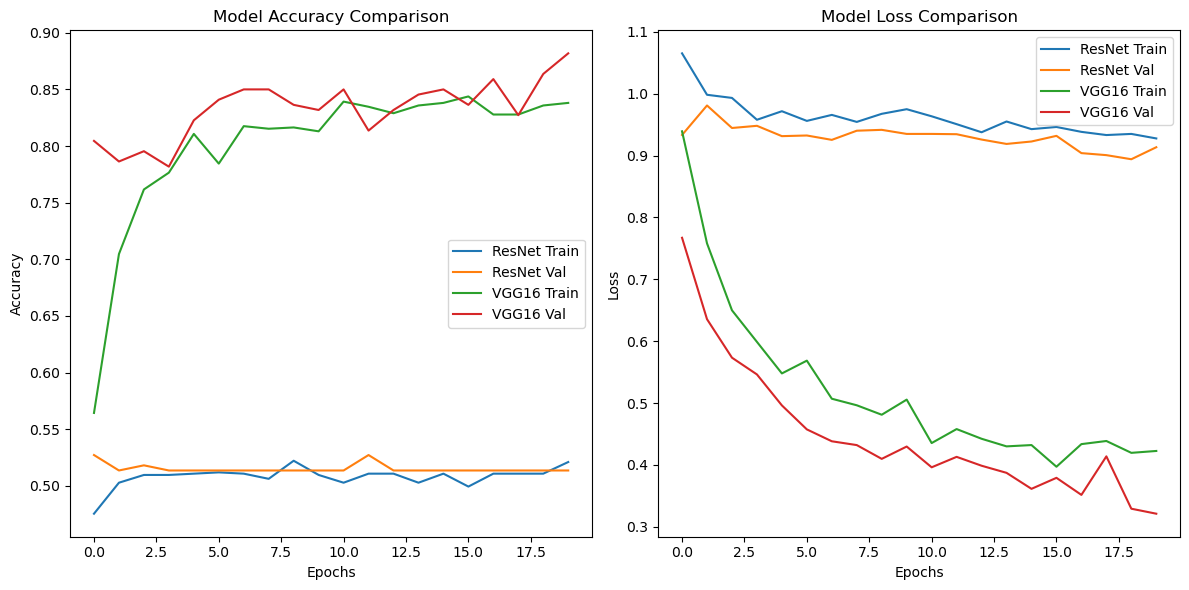

In [11]:
# Import libraries
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras import layers, models # For defining custom neural network layers and models
import matplotlib.pyplot as plt

# Assume train_generator and val_generator are already defined

# ResNet50 Training
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet_base.trainable = False
resnet_model = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resnet = resnet_model.fit(
    train_generator, 
    validation_data=val_generator,
    epochs=20  
)

# VGG16 Training
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
vgg_base.trainable = False
vgg_model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_vgg = vgg_model.fit(
    train_generator, 
    validation_data=val_generator,
    epochs=20 
)

# === After Training ===

# Evaluating each model
resnet_eval = resnet_model.evaluate(val_generator)
vgg_eval = vgg_model.evaluate(val_generator)

# Printing results
print(f"ResNet Accuracy: {resnet_eval[1]}")
print(f"VGG16 Accuracy: {vgg_eval[1]}")

# Comparing histories
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='ResNet Train')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Val')
plt.plot(history_vgg.history['accuracy'], label='VGG16 Train')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='ResNet Train')
plt.plot(history_resnet.history['val_loss'], label='ResNet Val')
plt.plot(history_vgg.history['loss'], label='VGG16 Train')
plt.plot(history_vgg.history['val_loss'], label='VGG16 Val')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# EfficientNetB7

In [12]:
# Import EfficientNetB7, layers, models, and optimizers from Keras
from tensorflow.keras.applications import EfficientNetB7  # Import EfficientNetB7 model
from tensorflow.keras import layers, models, optimizers  # Import necessary layers and model class

# Instantiating the EfficientNetB7 model with pre-trained ImageNet weights
base_model = EfficientNetB7(weights='imagenet',  # Load the pre-trained EfficientNetB7 weights
                            include_top=False,  # Exclude the top (classification) layer, as we will add custom layers
                            input_shape=(256,256,3),  # Set input shape to 256x256 images with 3 color channels (RGB)
                            classes=3)  # Number of output classes (benign, malignant, normal)

# Unfreeze the layers of EfficientNetB7 to allow fine-tuning
base_model.trainable = True  # Unfreeze all layers in the base model

# Set the layer from which fine-tuning should start (layer 100)
fine_tune_at = 100

# Freeze all layers before the fine-tune starting layer (up to layer 99)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False  # Freeze layers to prevent them from being updated during training

# Create a custom model using EfficientNetB7 as the base model
model3 = models.Sequential([
    base_model,  # Add the EfficientNetB7 base model
    layers.GlobalAveragePooling2D(),  # Apply global average pooling to reduce dimensions
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate to prevent overfitting
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes and softmax activation
])

# Print the summary of the model architecture
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 8, 8, 2560)       64097687  
                                                                 
 global_average_pooling2d_2   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 128)               327808    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 64,425,882
Trainable params: 63,989,355
Non-trainable params: 436,527
____________________________________

In [13]:
# Compiling the model
model3.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Training the model
history = model3.fit(
    train_generator, 
    epochs=25,  
    validation_data=val_generator,
    callbacks=[
        checkpoint_callback,
        reduce_lr
    ]
)


Epoch 1/25
110/110 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.5964
Epoch 1: val_loss improved from inf to 0.98800, saving model to best_model.h5
110/110 [==============================] - 767s 7s/step - loss: 0.8955 - accuracy: 0.5964 - val_loss: 0.9880 - val_accuracy: 0.5136 - lr: 1.0000e-04
Epoch 2/25
110/110 [==============================] - ETA: 0s - loss: 0.7371 - accuracy: 0.6899
Epoch 2: val_loss improved from 0.98800 to 0.87237, saving model to best_model.h5
110/110 [==============================] - 744s 7s/step - loss: 0.7371 - accuracy: 0.6899 - val_loss: 0.8724 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 3/25
110/110 [==============================] - ETA: 0s - loss: 0.6491 - accuracy: 0.7446
Epoch 3: val_loss improved from 0.87237 to 0.72973, saving model to best_model.h5
110/110 [==============================] - 754s 7s/step - loss: 0.6491 - accuracy: 0.7446 - val_loss: 0.7297 - val_accuracy: 0.6909 - lr: 1.0000e-04
Epoch 4/25
110/110 [===

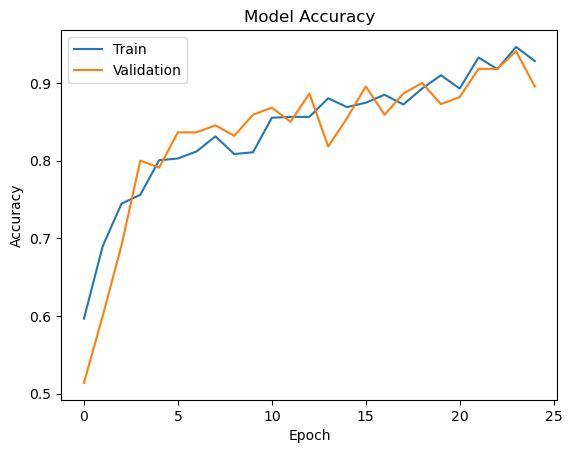

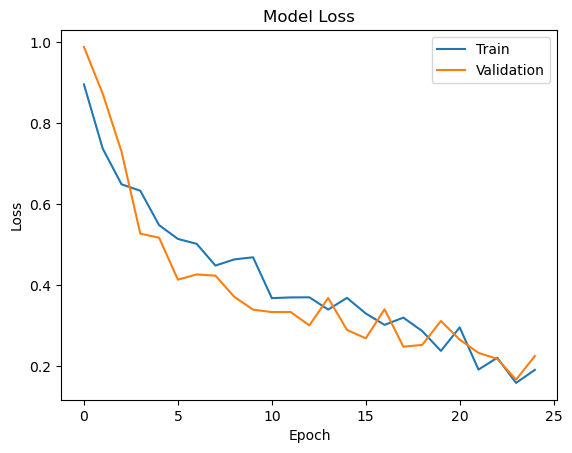

In [15]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)


report = classification_report(y_valid, y_pred_bool)
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)

7/7 [==============================] - 49s 6s/step


In [17]:
print("\nClassification Report:")
print(conf_mat)
print("\nClassification Report:")
print(report)


Classification Report:
[[ 14   0  10]
 [  0 109   4]
 [  2   0  81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       1.00      0.96      0.98       113
           2       0.85      0.98      0.91        83

    accuracy                           0.93       220
   macro avg       0.91      0.84      0.86       220
weighted avg       0.93      0.93      0.92       220



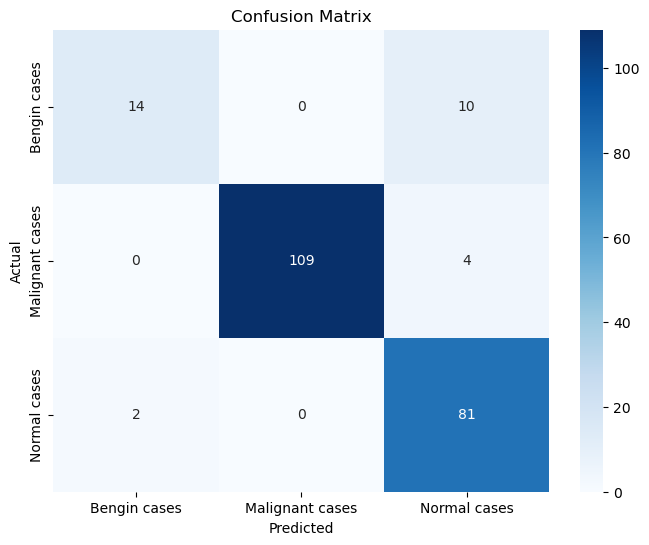

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix
conf_mat = confusion_matrix(y_true=y_valid, y_pred=y_pred_bool)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories,  
            yticklabels=categories)  
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Preprocessing Images for Classical Models

We can use a pretrained model like EfficientNetB7 to extract features, which can then be fed into classical ML models like SVM, Logistic Regression, and Random Forest.

In [19]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

def extract_features(X):
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False  # Freezing the model to use as a feature extractor,Freezes the weights to prevent updates during feature extraction.
    
    # Extract features
    features = []
    for img in X:
        img = cv2.resize(img, (256, 256))  # Resizing to match the input shape of EfficientNetB7
        img = np.expand_dims(img, axis=0)  # Adding batch dimension
        img = preprocess_input(img)  # Preprocessing the image for EfficientNetB7
        
        feature = base_model.predict(img)  # Extracting features
        feature = feature.flatten()  # Flattening the features to a vector
        features.append(feature)
    
    return np.array(features)

# Extract features from training and validation sets
X_train_features = extract_features(X_train)
X_valid_features = extract_features(X_valid)

print(X_train_features.shape)  # Checking the shape of the feature vector


(877, 163840)


# Train SVM, Logistic Regression

training the models using the features extracted from the EfficientNetB7 model.

In [51]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the models
svm_model = SVC(kernel='linear')
log_reg_model = LogisticRegression(max_iter=1000)


 
# Training the models
svm_model.fit(X_train_features, y_train)
log_reg_model.fit(X_train_features, y_train)


# Making predictions on the validation set
svm_pred = svm_model.predict(X_valid_features)
log_reg_pred = log_reg_model.predict(X_valid_features)


# Evaluating the models
print("SVM Accuracy:", accuracy_score(y_valid, svm_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_valid, log_reg_pred))


# Confusion matrix and classification report
print("SVM Classification Report:\n", classification_report(y_valid, svm_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_valid, log_reg_pred))



SVM Accuracy: 0.7954545454545454
Logistic Regression Accuracy: 0.759090909090909
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.83      0.95      0.88       113
           2       0.75      0.82      0.78        83

    accuracy                           0.80       220
   macro avg       0.53      0.59      0.56       220
weighted avg       0.71      0.80      0.75       220

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.79      0.92      0.85       113
           2       0.71      0.76      0.73        83

    accuracy                           0.76       220
   macro avg       0.50      0.56      0.53       220
weighted avg       0.67      0.76      0.71       220



# Comparing with the Deep Learning Model (EfficientNetB7)

Now that i have trained this classical models (SVM, Logistic Regression, Random Forest), so i can compare their performance to your EfficientNetB7 model.

To evaluate the EfficientNetB7 model, i am using the validation data and print the accuracy:

In [52]:
# Evaluate EfficientNetB7 model
efficientnet_accuracy = model3.evaluate(val_generator)
print(f"EfficientNetB7 Model Accuracy: {efficientnet_accuracy[1]}")

28/28 [==============================] - 46s 2s/step - loss: 0.2412 - accuracy: 0.8909
EfficientNetB7 Model Accuracy: 0.8909090757369995


# Visualizing the Results

 visualizing the performance of the models using a bar plot comparing the accuracy of each model:

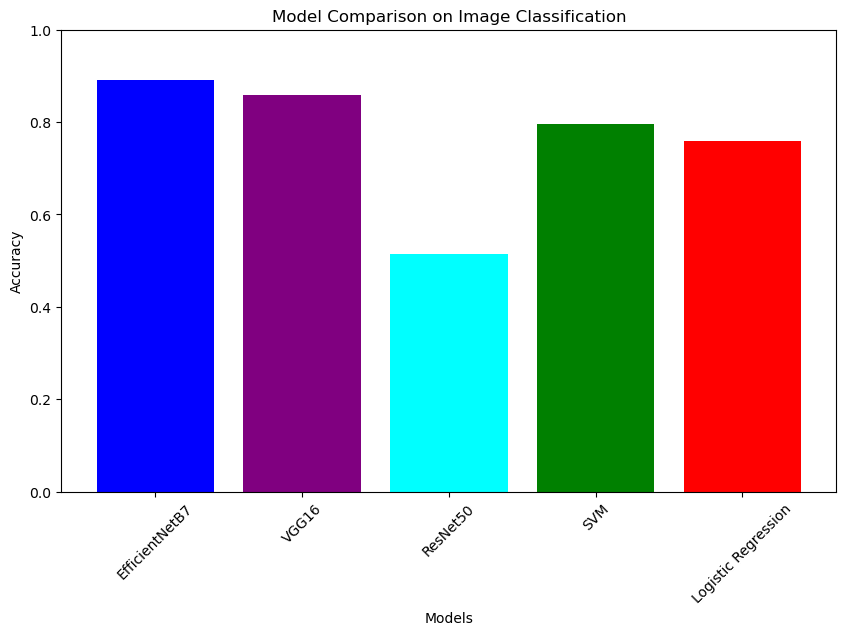

In [53]:
import matplotlib.pyplot as plt

# Collecting the accuracies
models = ['EfficientNetB7', 'VGG16', 'ResNet50', 'SVM', 'Logistic Regression']
accuracies = [
    efficientnet_accuracy[1],  # EfficientNetB7 accuracy from evaluate
    vgg_eval[1],               # VGG16 accuracy
    resnet_eval[1],            # ResNet50 accuracy
    accuracy_score(y_valid, svm_pred),  # SVM accuracy
    accuracy_score(y_valid, log_reg_pred),  # Logistic Regression accuracy
  
    
]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'purple', 'cyan', 'green', 'red'])
plt.title("Model Comparison on Image Classification")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()



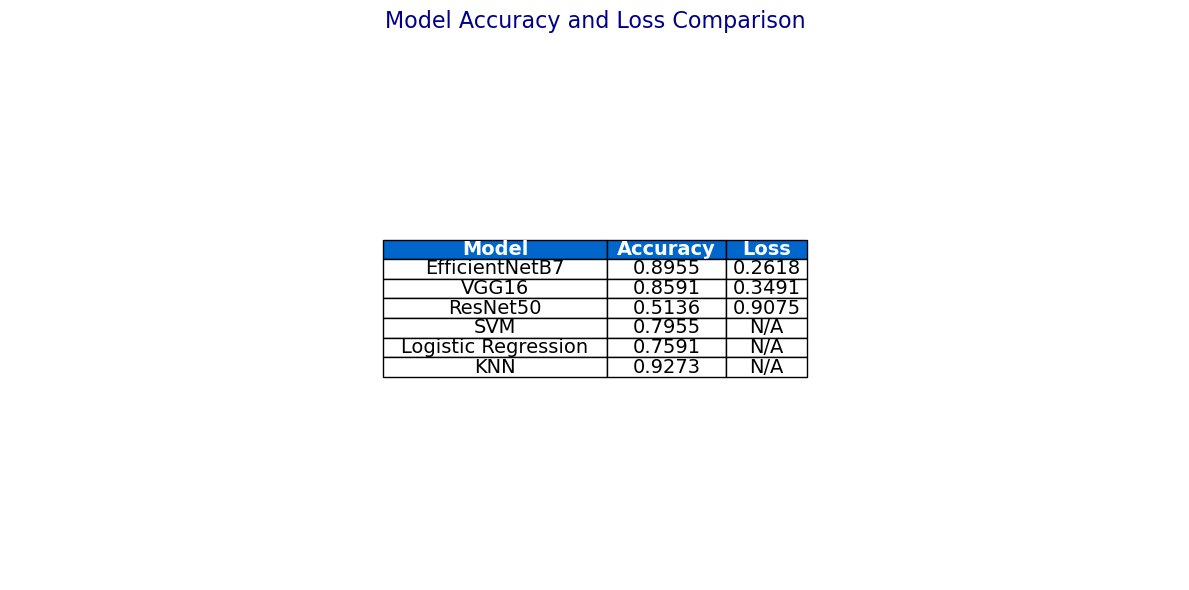

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


# Creating the DataFrame
results_df = pd.DataFrame(data)

# Style the table with a blue-green color gradient and larger font
styled_df = results_df.style.background_gradient(
    cmap='winter', subset=['Accuracy']  # Blue-green gradient for Accuracy column
).set_table_styles([
    {'selector': 'th', 'props': [('background-color', 'darkblue'), ('color', 'white'), ('font-weight', 'bold'), ('font-size', '14px')]},
    {'selector': 'td', 'props': [('font-size', '16px'), ('text-align', 'center')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#e6f7ff')]},  # Light blue zebra striping
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#b3e0ff')]},  # Darker blue for odd rows
])

# Display the styled DataFrame as an image using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size for a larger table
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, 
                 loc='center', cellLoc='center', rowLoc='center')

# Table Styling
table.auto_set_font_size(False)
table.set_fontsize(14)  # Larger font size for the table
table.auto_set_column_width(col=list(range(len(results_df.columns))))

# Highlight table headers
for key, cell in table.get_celld().items():
    if key[0] == 0:  # Header row
        cell.set_facecolor('#0066cc')  # Blue background for header
        cell.set_text_props(weight='bold', color='white')

plt.title("Model Accuracy and Loss Comparison", fontsize=16, color='darkblue')
plt.tight_layout()
plt.show()

# Display the styled DataFrame in a notebook
display(styled_df)


# Saving the Model

In [55]:
# Save as a SavedModel (recommended)
model3.save('efficientnetb7_model1')

# Save as an HDF5 file
model3.save('efficientnetb7_model1.h5')

INFO:tensorflow:Assets written to: efficientnetb7_model1/assets


In [56]:
from tensorflow.keras.models import load_model

# Load the SavedModel
loaded_model = load_model('efficientnetb7_model1')

# Load the HDF5 file
loaded_model = load_model('efficientnetb7_model1.h5')

# Evaluate the loaded model to confirm it works
loaded_model.evaluate(val_generator)

28/28 [==============================] - 56s 2s/step - loss: 0.2199 - accuracy: 0.9045


[0.21990175545215607, 0.9045454263687134]

In [57]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  
test_set = test_datagen.flow_from_directory(r"Desktop/pulmo_disease/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset",
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1097 images belonging to 3 classes.


# Prediction

In [58]:
from keras.preprocessing import image
import numpy as np

def predict_single_image(img_path, model3):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256, 256))  # Resize to model's input size
    x = image.img_to_array(img)  # Convert to numpy array
    x = x / 255.0               # Normalize the image
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    
    # Make prediction
    preds = model3.predict(x)
    class_idx = np.argmax(preds, axis=1)[0]  # Get predicted class index
    
    # Map class index to label (adjust based on your model's output)
    class_labels = {0: 'Benign', 1: 'Malignant', 2: 'Normal'}
    return class_labels.get(class_idx, "Unknown")

# Example usage
img_path = "Desktop/pulmo_disease/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (50).jpg"
result = predict_single_image(img_path, model3)
print("Prediction:", result)


Prediction: Normal
